# Problem Set 1

To run and solve this assignment, one must have a working IPython Notebook installation. The easiest way to set it up for both Windows and Linux is to install [Anaconda](https://www.anaconda.com/products/individual). Then save this file to your computer, run Anaconda and choose this file in Anaconda's file explorer. Use `Python 3` version. Below statements assume that you have already followed these instructions. If you are new to Python or its scientific library, Numpy, there are some nice tutorials [here](https://www.learnpython.org/) and [here](http://www.scipy-lectures.org/).

To run code in a cell or to render [Markdown](https://en.wikipedia.org/wiki/Markdown)+[LaTeX](https://en.wikipedia.org/wiki/LaTeX) press `Ctr+Enter` or `[>|]`(like "play") button above. To edit any code or text cell [double]click on its content. To change cell type, choose "Markdown" or "Code" in the drop-down menu above.

If a certain output is given for some cells, that means that you are expected to get similar results in order to receive full points (small deviations are fine). For some parts we have already written the code for you. You should read it closely and understand what it does.

Total: 85 points.

## [30pts] Problem 1: Backprop in a simple MLP
This problem asks you to derive all the steps of the backpropagation algorithm for a simple classification network. Consider a fully-connected neural network, also known as a multi-layer perceptron (MLP), with a single hidden layer and a one-node output layer. The hidden and output nodes use an elementwise sigmoid activation function and the loss layer uses cross-entropy loss:
<p>
$f(z)=\frac{1}{1+exp(-z))}$
<br>
$L(\hat{y},y)=-yln(\hat{y}) - (1-y)ln(1-\hat{y})$
</p>
<p>
The computation graph for an example network is shown below. Note that it has an equal number of nodes in the input and hidden layer (3 each), but, in general, they need not be equal. Also, to make the application of backprop easier, we show the <i>computation graph</i> which shows the dot product and activation functions as their own nodes, rather than the usual graph showing a single node for both.
</p>

<img src="mlpgraph.png" style="height:200px;">

The forward and backward computation are given below. NOTE: We assume no regularization, so you can omit the terms involving $\Omega$.

The forward step is: 

<img src="forward.png" style="width:500px;">

and the backward step is:

<img src="backward.png" style="width:500px;">

Write down each step of the backward pass explicitly for all layers, i.e. for the loss and $k=2,1$, compute all gradients above, expressing them as a function of variables $x, y, h, W, b$. 
We start by giving an example. Note that we have replaced the superscript notation $u^{(i)}$ with $u^i$, and $\odot$ stands for element-wise multiplication.

$ \nabla_{\hat{y}}L(\hat{y},y) =  \nabla_{\hat{y}}[-yln(\hat{y}) - (1-y)ln(1-\hat{y})] = \frac{\hat{y}-y}{(1-\hat{y})\hat{y}} = \frac{h^2-y}{(1-h^2)h^2}$

Next, please derive the following.

<i>Hint: you should substitute the updated values for the gradient $g$ in each step and simplify as much as possible.</i>  

**Useful information about vectorized chain rule and backpropagation**:
<br> If you are struggling with computing the vectorized version of chain rule for the backpropagation question in problem set 4, you may find this example helpful:
https://web.stanford.edu/class/cs224n/readings/gradient-notes.pdf
<br> It also contains some helpful shortcuts for computing gradients.

**[5pts] Q1.1**: $\nabla_{a^2}J$

$ \frac {h^2-y}{(1-h^2)h^2} \cdot \frac {e^{-a^2}}{(1 + e^{-a^2})^2} $

**[5pts] Q1.2**: $\nabla_{b^2}J$

$ \nabla_{b^2}J = \nabla_{a^2}J = \frac {h^2-y}{(1-h^2)h^2} \cdot \frac {e^{-a^2}}{(1 + e^{-a^2})^2} $

**[5pts] Q1.3**: $\nabla_{W^2}J$ <br><i>Hint: this should be a vector, since $W^2$ is a vector. </i>

$ \nabla_{W^2}{a^2} = {(h^1)^{T}} $  
$ {a^2} = {W^2} \cdot {h^1} + {b^2} $

$ \nabla_{W^2}J = \nabla_{W^2}{a^2} \cdot \nabla_{a^2}J = \frac {h^2-y}{(1-h^2)h^2} \cdot \frac {e^{-a^2}}{(1 + e^{-a^2})^2}\cdot{(h^1)^{T}} $

**[5pts] Q1.4**: $\nabla_{h^1}J$ 

$ \nabla_{h^1}{a^2} = {(W^2)^{T}} $

$ \nabla_{h^1}J = \nabla_{h^1}{a^2} \cdot \nabla_{a^2}J = {(W^2)^{T}} \cdot (\frac {h^2-y}{(1-h^2)h^2} \cdot \frac {e^{-a^2}}{(1 + e^{-a^2})^2}) $

**[5pts] Q1.5**: $\nabla_{b^1}J$, $\nabla_{W^1}J$

$ \nabla_{b^1}J = \nabla_{a^1}J = {(W^2)^{T}} \cdot (\frac {h^2-y}{(1-h^2)h^2} \cdot \frac {e^{-a^2}}{(1 + e^{-a^2})^2}) \odot \frac {e^{-a^1}}{(1 + e^{-a^1})^2} $

$ \nabla_{W^1}J = \nabla_{a^1}J = {(W^2)^{T}} \cdot (\frac {h^2-y}{(1-h^2)h^2} \cdot \frac {e^{-a^2}}{(1 + e^{-a^2})^2}) \odot \frac {e^{-a^1}}{(1 + e^{-a^1})^2}) \cdot {(h^0)^{T}} $

**[5pts] Q1.6** Briefly, explain how the computational speed of backpropagation would be affected if it did not include a forward pass

If a forward pass is not included, the value of forward pass will not be stored. As a result, all value are required to compute again in every step of backpropagation.

## [35pts] Problem 2: Logistic Regression

In this part of the exercise, you will build a logistic regression model to predict whether a student
gets admitted into a university.

Suppose that you are the administrator of a university department and you want to determine
each applicant’s chance of admission based on their results on two exams. You have historical
data from previous applicants in *ex2data1.txt* that you can use as a training set for logistic regression. For each
training example, you have the applicant’s scores on two exams and the admissions decision.

Your task is to build a classification model that estimates an applicant’s probability of admission based on the scores from those two exams. This outline and code framework will guide you through the exercise.

**2\.1 Implementation**

In [3]:
import sys
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
print('Tested with:')
print('Python', sys.version)
print({x.__name__: x.__version__ for x in [np, matplotlib]})

Tested with:
Python 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
{'numpy': '1.20.1', 'matplotlib': '3.3.4'}


**2.1.1 Visualizing the data**

Before starting to implement any learning algorithm, it is always good to visualize the data if possible. This first part of the code will load the data and display it on a 2-dimensional plot by calling the function plotData. The axes are the two exam scores, and the positive and negative examples are shown with different markers.

In [4]:
def read_classification_csv_data(fn, add_ones=False):
    # read comma separated data
    data = np.loadtxt(fn, delimiter=',')
    X_, y_ = data[:, :-1], data[:, -1, None]  # a fast way to keep last dim

    print(X_.shape, X_.min(), X_.max(), X_.dtype)
    print(y_.shape, y_.min(), y_.max(), y_.dtype)
    # note that y is float! 

    # insert the column of 1's into the "X" matrix (for bias)
    X = np.insert(X_, X_.shape[1], 1, axis=1) if add_ones else X_
    y = y_.astype(np.int32)
    return X, y
    
X_data, y_data = read_classification_csv_data('ex2data1.txt', add_ones=True)
print(X_data.shape, X_data.min(), X_data.max(), X_data.dtype)
print(y_data.shape, y_data.min(), y_data.max(), y_data.dtype)

(100, 2) 30.05882244669796 99.82785779692128 float64
(100, 1) 0.0 1.0 float64
(100, 3) 1.0 99.82785779692128 float64
(100, 1) 0 1 int32


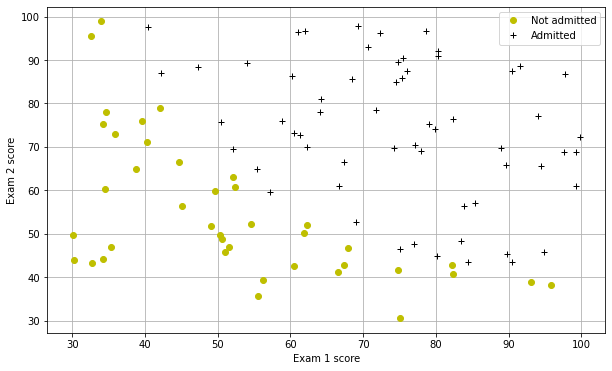

In [5]:
# how does the *X[y.ravel()==1, :2].T trick work?
# https://docs.python.org/3/tutorial/controlflow.html#unpacking-argument-lists

def plot_data(X, y, labels, markers, xlabel, ylabel, figsize=(10, 6), ax=None):
    if figsize is not None:
        plt.figure(figsize=figsize)

    ax = ax or plt.gca()
    for label_id, (label, marker) in enumerate(zip(labels, markers)):        
        ax.plot(*X[y.ravel()==label_id, :2].T, marker, label=label)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.legend()
    ax.grid(True)
    
student_plotting_spec = {
    'X': X_data,
    'y': y_data, 
    'xlabel': 'Exam 1 score', 
    'ylabel': 'Exam 2 score',
    'labels': ['Not admitted', 'Admitted'], 
    'markers': ['yo', 'k+'], 
    'figsize': (10, 6)
}
    
plot_data(**student_plotting_spec)
plt.show()

**2.1.2 [5pts] Sigmoid function** 

Before you start with the actual cost function, recall that the logistic regression hypothesis is defined as:

$h_\theta(x) = g(\theta^Tx)$

where function g is the sigmoid function. The sigmoid function is defined as:

$g(z) = \dfrac{1}{1+e^{-z}}$

Your first step is to implement/find a sigmoid function so it can be called by the rest of your program. Your code should also work with vectors and matrices. For a matrix, your function should perform the sigmoid function on every element. 

When you are finished, (a) plot the sigmoid function, and (b) test the function with a scalar, a vector, and a matrix. For scalar large positive values of x, the sigmoid should be close to 1, while for scalar large negative values, the sigmoid should be close to 0. Evaluating sigmoid(0) should give you exactly 0.5.

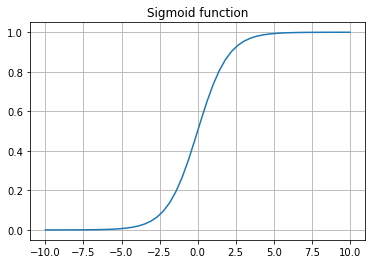

In [6]:
# check out scipy.special for great variaty of vectorized functions
# remember that sigmoid is the inverse of logit function
# maybe worth checking out scipy.special.logit first


def sigmoid (x):   
    f = 1 / (1 + np.exp(-x))
    return f

def check_that_sigmoid_f(f):
    x_test = np.linspace(-10, 10, 50)
    sigm_test = f(x_test)
    plt.plot(x_test, sigm_test)
    plt.title("Sigmoid function")
    plt.grid(True)
    plt.show()
    
check_that_sigmoid_f(sigmoid)

**2.1.3 [15pts] Cost function and gradient**

Now you will implement the cost function and gradient for logistic regression. Complete the code
in the functions *hyposesis_function* and *binary_logistic_loss* below to return the value of the hypothesis function and the cost, respectively. Recall that the cost function in logistic regression is

$J(\theta) \ = \ \frac{1}{m} \ \sum_{i=1}^{m} \ [ \ -y^{(i)} log(h_\theta(x^{(i)})) \ - \ (1 - y^{(i)})log(1-h_\theta(x^{(i)})) \ ]$

and the gradient of the cost is a vector of the same length as $\theta$ where the $j^{th}$ element (for $j = 0, 1,...,n$) is defined as follows:

$\frac{\partial J(\theta)}{\partial \theta_{j}} \ = \ \frac{1}{m} \ \sum_{i=1}^{m} \ (h_\theta(x^{(i)})-y^{(i)}) x_j^{(i)}$

where $m$ is the number of points and $n$ is the number of features. Note that while this gradient looks identical to the linear regression gradient, the formula is
actually different because linear and logistic regression have different definitions of $h_\theta(x)$.

What should be the value of the loss for $\theta = \bar 0$ regardless of input? Why? Make sure your code also outputs this value.

In [7]:
# we are trying to fit a function that would return a 
# "probability of "

# hyposesis_function describes parametric family of functions that we are
# going to pick our "best fitting function" from. It is parameterized by
# real-valued vector theta, i.e. we are going to pick
#    h_best = argmin_{h \in H} logistic_loss_h(x, y, h)
# but because there exist a bijection between theta's and h's it is 
# eqvivalent to choosing
#    theta_best = argmin_{theta \in H} logistic_loss_theta(x, y, theta)
import numpy as np

def hyposesis_function(x, theta):
    z = np.dot (x,theta)
    f = 1 / (1 + np.exp(-z))
    return f

# negative log likelihood of observing sequence of integer
# y's given probabilities y_pred's of each Bernoulli trial
# recommentation: convert both variables to floats 
# to avoid scenarios like -1*y != -y for uint8
# use np.mean and broadcasting
def binary_logistic_loss(y, y_pred): 
    
    assert y_pred.shape == y.shape
    y, y_pred = y.astype(np.float64), y_pred.astype(np.float64)
    # When y_pred = 0, log(0) = -inf, 
    # we could add a small constant to avoid this case
    CONSTANT = 0.000001
    y_pred = np.clip(y_pred, 0+CONSTANT, 1-CONSTANT)
    
    l = (-1) * np.mean (np.sum( y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)))
    l /= 100
    return l


def logistic_loss_theta_grad(x, y, h, theta):
    """
    Arguments (np arrays of shape):
        
        x : [m, n] ground truth data
        y : [m, 1] ground truth prediction
        h : [m, n] -> [m, 1] our guess for a prediction function
    
    """
    # reshape theta: n by 1
    theta = theta.reshape((-1,1))
    y_pred = h(x, theta)
    point_wise_grads = (y_pred - y)*x
    grad = np.mean(point_wise_grads, axis=0)[:, None]
    assert grad.shape == theta.shape
    return grad.ravel()
    

def logistic_loss_theta(x, y, h, theta):
    # reshape theta: n by 1
    theta = theta.reshape((-1,1))
    return binary_logistic_loss(y, h(x, theta))


In [8]:
# Check that with theta as zeros, cost is about 0.693:
theta_init = np.zeros((X_data.shape[1], 1))
print(logistic_loss_theta(X_data, y_data, hyposesis_function, theta_init))
print(logistic_loss_theta_grad(X_data, y_data, hyposesis_function, theta_init))

0.6931471805599453
[-12.00921659 -11.26284221  -0.1       ]


**2.1.4 Learning parameters using *scipy.optimize***

Instead of taking gradient descent steps, use a scipy.optimize built-in function called *scipy.optimize.minimize*. In this case, we will use the *[conjugate gradient algorithm](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-cg.html)*. 

The final $\theta$ value will then be used to plot the
decision boundary on the training data, as seen in the figure below.

In [9]:
import scipy.optimize
from functools import partial

In [10]:
def optimize(theta_init, loss, loss_grad, max_iter=10000, print_every=1000, optimizer_fn=None, show=False):
    theta = theta_init.copy()
    opt_args = {'x0': theta_init, 'fun': loss, 'jac': loss_grad, 'options': {'maxiter': max_iter}}

    loss_curve = []
    def scipy_callback(theta):
        f_value = loss(theta)
        loss_curve.append(f_value)
        
    if optimizer_fn is None:
        optimizer_fn = partial(scipy.optimize.minimize, method='CG', callback=scipy_callback)

    opt_result = optimizer_fn(**opt_args)
    
    if show:
        plt.plot(loss_curve)
        plt.show()
    
    return opt_result['x'].reshape((-1, 1)), opt_result['fun']

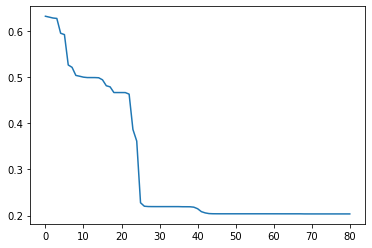

0.20349786143426274


In [11]:
theta_init = np.zeros((3, 1))
loss = partial(logistic_loss_theta, X_data, y_data, hyposesis_function)
loss_grad = partial(logistic_loss_theta_grad, X_data, y_data, hyposesis_function)
theta, best_cost = optimize(theta_init, loss, loss_grad, show=True)
print(best_cost)

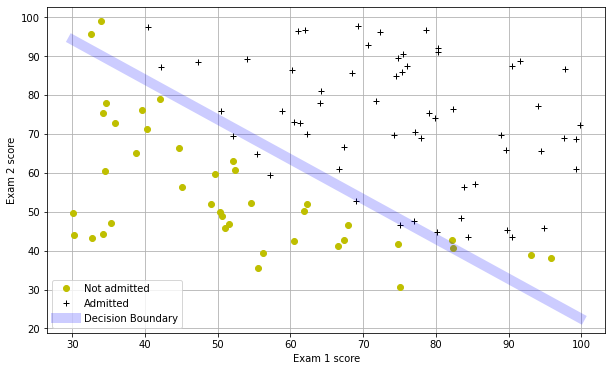

In [12]:
# Plotting the decision boundary: two points, draw a line between
# Decision boundary occurs when h = 0, or when
# theta_0*x1 + theta_1*x2 + theta_2 = 0
# y=mx+b is replaced by x2 = (-1/theta1)(theta2 + theta0*x1)

line_xs = np.array([np.min(X_data[:,0]), np.max(X_data[:,0])])
line_ys = (-1./theta[1])*(theta[2] + theta[0]*line_xs)
plot_data(**student_plotting_spec)
plt.plot(line_xs, line_ys, 'b-', lw=10, alpha=0.2, label='Decision Boundary')
plt.legend()
plt.show()

**2.1.5 [15pts] Evaluating logistic regression**

After learning the parameters, you can use the model to predict whether a particular student will
be admitted. 

(a) [5 pts] Show that for a student with an Exam 1 score of 45 and an Exam 2 score of 85, you should
expect to see an admission probability of 0.776.

Another way to evaluate the quality of the parameters we have found is to see how well the
learned model predicts on our training set. 

(b) [10 pts] In this part, your task is to complete the code in
*makePrediction*. The predict function will produce “1” or “0” predictions given a dataset and a learned
parameter vector $\theta$. After you have completed the code, the script below will proceed to report the
training accuracy of your classifier by computing the percentage of examples it got correct. You
should also see a Training Accuracy of 89.0. 

In [13]:
# For a student with an Exam 1 score of 45 and an Exam 2 score of 85, 
# you should expect to see an admission probability of 0.776.
check_data = np.array([[45., 85., 1]])
print(check_data.shape)
print(hyposesis_function(check_data, theta))

(1, 3)
[[0.77601741]]


In [14]:
# use hyposesis function and broadcast compare operator
def predict(x, theta):
    z = np.dot (x,theta)
    f = 1 / (1 + np.exp(-z))
    return f

def accuracy(x, y, theta):
    y_pred = predict (x, theta)
    
    for i in range(len(y_pred)):
        if (y_pred[i,0] >= 0.5):
            y_pred[i,0] = 1
        else:
            y_pred[i,0] = 0
            
    count = 0
    for i in range(len(y)):
        if (y_pred[i,0] == y[i,0]):
            count += 1
    
    return (count / len(y))
    

print(accuracy(X_data, y_data, theta))

0.89


## [20pts] Problem 3: Simple Regularization Methods
In learning neural networks, aside from minimizing a loss function $\mathcal{L}(\theta)$ with respect to the network parameters $\theta$, we usually explicitly or implicitly add some regularization term to reduce overfitting. A simple and popular regularization strategy is to penalize some *norm* of $\theta$.

### [10pts] Q3.1:  L2 regularization

We can penalize the L2 norm of $\theta$: we modify our objective function to be $\mathcal{L}(\theta) + \lambda \|\theta\|^2$ where $\lambda$ is the weight of regularization. 
We will minimize this objective using gradient descent with step size $\eta$.
Derive the update rule: at time $t+1$, express the new parameters $\theta_{t+1}$ in terms of the old parameters $\theta_t$, the gradient $g_t=\frac{\partial \mathcal{L}}{\partial \theta_t}$, $\eta$, and $\lambda$.

$ \|\theta\|^2 = tr( \theta^T \cdot \theta) $

$ tr( \theta^T \cdot \theta) = tr(({d}\theta^{T} \cdot \theta) + tr(\theta^{T}{d}\theta) $

$ tr( \theta^T \cdot \theta) = tr(2\theta^{T}{d}\theta)$

$ \frac {\partial tr(\theta^{T} \cdot \theta)}{\partial \theta} = 2\theta $

$ \theta_{t+1} = \theta_t - \eta * (g_t + 2\lambda\theta_t) $

### [10pts] Q3.2:  L1 regularization

Now let's consider L1 regularization: our objective in this case is $\mathcal{L}(\theta) + \lambda \|\theta\|_1$. Derive the update rule. 

(Technically this becomes *Sub-Gradient* Descent since the L1 norm is not differentiable at 0. But practically it is usually not an issue.)

let $ g(x) = x^{\frac {1}{2}} $

$ \frac {\partial \|\theta\|_{1}} {\partial \theta} = \|\theta_2\|^{\frac {-1} {2}} \odot \theta $

$ \theta_{t+1} = \theta_t - \eta * (g_t + \lambda \|\theta_2\|^{\frac {-1} {2}} \odot \theta) $